In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from src.utils import switch_quotes, save_figure

In [198]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c","#d62728", "#9467bd"]
data = pd.read_csv("tuning_r1.csv")


data['params'] = data['params'].apply(lambda x: json.loads(switch_quotes(x)))
params = data['params'][0].keys()
# add params as individual columns
data = pd.concat([data.drop(['params'], axis=1), data['params'].apply(pd.Series)], axis=1)

In [239]:
rank_by = 'MAPE test'

param_titles = {'min_epochs': 'Minimum number of epochs before early stopping', 'learning_rate': 'Learning rate AdamW', 
                'dropout': 'Dropout', 'l2_penalty': 'L2 penalty', 'init_stride': 'Initial CNN'}

results = data[['Dataset', 'min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride', rank_by]]
models = results[['min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']
        ].sort_values(by=[ 'min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']).drop_duplicates().reset_index()
models['index'] = [f'Model {i}' for i in range(len(models))]
models = models.rename(columns={'index': 'Model'}).rename(columns=param_titles)
models['Initial CNN'] = models['Initial CNN'].apply(lambda x: 'With' if x==2 else 'Without')
num_models = len(models)

models.to_csv("model_overview.csv", index=False)


In [241]:
# parameter combinations

param_overview = {}
for i, param in enumerate(models.columns[1:]):
    param_overview[param] = str(models[param].unique())
param_overview = pd.DataFrame(param_overview, index=[0]).T.reset_index().rename(columns={0: 'Values', 'index': 'Parameter'})
param_overview.to_csv("tuning_param_overview.csv", index=False)
param_overview


,Parameter,Values
0,Minimum number of epochs before early stopping,[ 50 800]
1,Learning rate AdamW,[1.e-05 1.e-04 1.e-03]
2,Dropout,[0. 0.3]
3,L2 penalty,[0. 0.001]
4,Initial CNN,['Without' 'With']


In [ ]:
models
models.to_csv("model_overview.csv", index=False)


# Present ranks per dataset

In [217]:
# Ranking

ranked = []
to_show = []
for grp_idx, grp in results.groupby('Dataset'):
    # sort
    grp = grp.sort_values(rank_by)
    # add rank
    grp['Rank'] = range(1, len(grp) + 1)

    ranked.append(grp)
    # keep first three
    to_show.append(grp.iloc[:3])

ranked = pd.concat(ranked)
to_show = pd.concat(to_show)

to_show.groupby(['Dataset', 'Rank']).first() # because of ranking, there is just one line per group --> can do first


min_epochs  learning_rate  dropout  l2_penalty  \
Dataset      Rank                                                   
DS_-10_10_10 1             50        0.00010      0.3       0.001   
             2            800        0.00010      0.0       0.001   
             3            800        0.00001      0.0       0.001   
DS_-10_80_10 1            800        0.00001      0.0       0.001   
             2            800        0.00010      0.0       0.000   
             3            800        0.00010      0.0       0.001   
DS_0_10_10   1            800        0.00100      0.0       0.000   
             2            800        0.00001      0.0       0.001   
             3            800        0.00001      0.3       0.001   
DS_0_80_10   1             50        0.00010      0.3       0.001   
             2            800        0.00010      0.0       0.000   
             3            800        0.00001      0.0       0.001   
DS_10_10_10  1            800        0.00001      0.0       0.001   
             2             50        0.00001      0.3       0.000   
             3             50        0.00010      0.3       0.000   
DS_10_80_10  1             50        0.00010      0.3       0.001   
             2            800        0.00001      0.0       0.000   
             3            800        0.00001      0.3       0.000   
DS_20_10_10  1             50        0.00010      0.0       0.001   
             2             50        0.00010      0.0       0.000   
             3            800        0.00010      0.0       0.001   
DS_20_80_10  1            800        0.00100      0.0       0.001   
             2            800        0.00100      0.0       0.001   
             3            800        0.00010      0.0       0.001   
DS_50_10_10  1            800        0.00100      0.0       0.001   
             2            800        0.00010      0.0       0.001   
             3            800        0.00100      0.0       0.000   
DS_50_80_10  1             50        0.00100      0.0       0.001   
             2            800        0.00100      0.0       0.000   
             3             50        0.00100      0.0       0.000   
DS_80_10_10  1            800        0.00100      0.0       0.001   
             2            800        0.00010      0.3       0.001   
             3            800        0.00100      0.0       0.000   
DS_80_80_10  1            800        0.00100      0.0       0.000   
             2            800        0.00010      0.0       0.001   
             3            800        0.00010      0.0       0.000   

                   init_stride  MAPE test  
Dataset      Rank                          
DS_-10_10_10 1              -1   0.187687  
             2               2   0.188277  
             3              -1   0.188464  
DS_-10_80_10 1              -1   0.189047  
             2              -1   0.191688  
             3              -1   0.194414  
DS_0_10_10   1               2   0.191602  
             2              -1   0.193540  
             3              -1   0.193600  
DS_0_80_10   1               2   0.189260  
             2              -1   0.192069  
             3              -1   0.192235  
DS_10_10_10  1              -1   0.188016  
             2              -1   0.189119  
             3              -1   0.189428  
DS_10_80_10  1              -1   0.181563  
             2              -1   0.186833  
             3               2   0.188961  
DS_20_10_10  1               2   0.177773  
             2               2   0.177952  
             3               2   0.179435  
DS_20_80_10  1               2   0.172207  
             2              -1   0.175689  
             3               2   0.179942  
DS_50_10_10  1              -1   0.140970  
             2              -1   0.143620  
             3              -1   0.145662  
DS_50_80_10  1              -1   0.117498  
             2               2   0.117515  
             3              -1  

In [218]:
ranked.pivot_table(index='Dataset', columns='Rank', values=rank_by)

Rank,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Dataset,,,,,,,,,,,,,,,,,,,,,
DS_-10_10_10,0.187687,0.188277,0.188464,0.188721,0.189853,0.193086,0.196015,0.197900,0.198861,0.201039,...,0.419180,0.452195,0.460849,0.503611,0.525404,0.548689,0.692464,0.734388,0.745224,0.805736
DS_-10_80_10,0.189047,0.191688,0.194414,0.194703,0.195614,0.195800,0.196967,0.197657,0.198941,0.200525,...,0.334849,0.374793,0.379961,0.380076,0.382213,0.431248,0.571227,0.636462,0.640599,0.688734
DS_0_10_10,0.191602,0.193540,0.193600,0.194299,0.194742,0.196206,0.196895,0.197334,0.198547,0.199999,...,0.427199,0.427466,0.437942,0.439672,0.534320,0.541253,0.553742,0.625903,0.662780,0.726326
DS_0_80_10,0.189260,0.192069,0.192235,0.195593,0.197725,0.198552,0.199323,0.199841,0.201351,0.203568,...,0.461226,0.505476,0.535509,0.586985,0.595878,0.667267,0.723136,0.731063,1.062602,1.360412
DS_10_10_10,0.188016,0.189119,0.189428,0.189537,0.190166,0.190524,0.192411,0.193159,0.193418,0.194436,...,0.312432,0.313610,0.320810,0.340207,0.342986,0.356651,0.365860,0.493057,0.568351,0.573175
DS_10_80_10,0.181563,0.186833,0.188961,0.192253,0.192945,0.193481,0.194841,0.197359,0.197752,0.200361,...,0.509154,0.527460,0.557908,0.561465,0.564238,0.639949,0.713190,0.714297,0.733475,0.755431
DS_20_10_10,0.177773,0.177952,0.179435,0.180406,0.183065,0.183077,0.183720,0.184055,0.185787,0.185909,...,0.254075,0.255010,0.267970,0.288112,0.302469,0.308467,0.338219,0.368401,0.436077,0.437704
DS_20_80_10,0.172207,0.175689,0.179942,0.181295,0.181563,0.183266,0.184560,0.187604,0.188930,0.189071,...,0.351435,0.446299,0.586268,0.632230,0.655090,0.685909,0.727296,0.774832,0.850118,1.331696
DS_50_10_10,0.140970,0.143620,0.145662,0.147891,0.156239,0.159141,0.159625,0.160900,0.162122,0.168626,...,0.225969,0.267710,0.269417,0.378857,0.391438,0.429168,0.473138,0.744226,0.835317,0.944704


In [219]:
# the whole ranking

ranked.groupby(['Dataset', 'Rank']).first()

min_epochs  learning_rate  dropout  l2_penalty  \
Dataset      Rank                                                   
DS_-10_10_10 1             50        0.00010      0.3       0.001   
             2            800        0.00010      0.0       0.001   
             3            800        0.00001      0.0       0.001   
             4             50        0.00010      0.3       0.000   
             5            800        0.00001      0.3       0.001   
...                       ...            ...      ...         ...   
DS_80_80_10  44           800        0.00100      0.3       0.001   
             45            50        0.00001      0.0       0.000   
             46            50        0.00100      0.3       0.000   
             47            50        0.00100      0.0       0.000   
             48            50        0.00100      0.0       0.001   

                   init_stride  MAPE test  
Dataset      Rank                          
DS_-10_10_10 1              -1   0.187687  
             2               2   0.188277  
             3              -1   0.188464  
             4              -1   0.188721  
             5               2   0.189853  
...                        ...        ...  
DS_80_80_10  44             -1   0.637787  
             45              2   0.649978  
             46              2   0.777106  
             47              2   2.230341  
             48              2   2.269714  

[576 rows x 6 columns]

# Pairwise-wilcoxons signed-rank test
1. performed on ranks
2. using the holm-correction when forming groups


/tmp/ipykernel_17623/2283340898.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('magma_r', num_models)    # 11 discrete colors


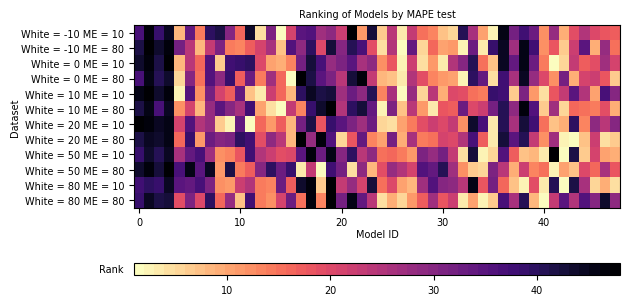

,DS_-10_10_10,DS_-10_80_10,DS_0_10_10,DS_0_80_10,DS_10_10_10,DS_10_80_10,DS_20_10_10,DS_20_80_10,DS_50_10_10,DS_50_80_10,DS_80_10_10,DS_80_80_10,min_epochs,learning_rate,dropout,l2_penalty,init_stride
0,37,42,44,37,46,42,48,42,39,44,38,39,50,0.00001,0.0,0.0,-1
12,4,21,20,14,3,10,16,19,25,30,14,14,50,0.00010,0.3,0.0,-1
40,12,12,14,20,4,6,15,12,3,15,3,1,800,0.00100,0.0,0.0,-1


In [220]:
performance_data = {}

for idx, grp in ranked.groupby(['Dataset']):
    grp_sorted = grp.sort_values(by=['min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']) 
    performance_data[idx[0]] = grp_sorted['Rank'].values

plt.figure(figsize=(10, 5))
performance_data = pd.DataFrame(performance_data) # model id x dataset name
cmap = plt.cm.get_cmap('magma_r', num_models)    # 11 discrete colors

im = plt.imshow(performance_data.T, cmap=cmap, aspect=1.5)
#axis('off')
cbar = plt.colorbar(orientation='horizontal', aspect=40)
cbar.ax.invert_yaxis()
plt.title(f'Ranking of Models by {rank_by}')
#plt.xticks(range(len(performance_data)//2), [x for x in performance_data.index if x%2==0])
plt.yticks(range(len(performance_data.columns)), [f"White = {x.split('_')[1]} ME = {x.split('_')[2]}" for x in performance_data.columns])
plt.ylabel('Dataset')
plt.xlabel('Model ID', )
plt.tight_layout()
# place the text Rank at position (-1,-1)
plt.text(-4, 15.75, 'Rank', color='black')
plt.gcf().set_size_inches(5.5, 4)
plt.savefig(f'tune_ranking_{rank_by.replace(" ", "_")}.pdf', bbox_inches='tight')
#save_figure('tune_ranking')
plt.show()

# just using last group but it should be the same order for all
performance_data = pd.concat((performance_data, 
                              grp_sorted.reset_index()[['min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']]), 
                              axis=1)

performance_data.iloc[[0, 12, 40]]

In [221]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

# compare models with wilcoxon
alpha = 0.05

p_values = []

for i in range(num_models):
    for j in range(num_models):
        #print(f"Comparing model {i} with model {j}")
        if i == j:
            p_values.append(0)
            continue
        datasets = [x for x in performance_data.columns if x.startswith('DS')]
        res = wilcoxon(performance_data[datasets].loc[i], 
                       performance_data[datasets].loc[j], 
                       method='exact')
        p_values.append(res.pvalue) # if p low enough there is a difference. if the p is higer than alpha, there is no significant difference
adjusted_p_values = p_values
#adjusted_p_values = multipletests(p_values, alpha=0.1)[1] # we have so many models, that the correction is extremely strict. 

#print(adjusted_p_values[1])

# Create a matrix of indistinguishable models with adjusted p_values
indistinguishable_matrix = np.zeros((num_models, num_models))
for i in range(num_models):
    for j in range(num_models):
        if i == j:
            continue
        indistinguishable_matrix[i, j] = adjusted_p_values[i*num_models+j] > alpha
#pd.DataFrame(indistinguishable_matrix)

# Group models based on indistinguishability
groups = []
for model in range(num_models):
    found = False
    for group in groups:
        if all(indistinguishable_matrix[model, member] == 1 for member in group):
            group.append(model)
            found = True
            break
    if not found:
        groups.append([model])

# Display the groups of indistinguishable models
print("Indistinguishable Model Groups:")
for group in groups:
    print(group)

Indistinguishable Model Groups:
[0, 2, 17, 19, 21, 36, 38]
[1, 3]
[4, 6, 8, 9, 10, 11, 13, 14, 15, 18, 23, 25, 27, 28, 29, 30, 31, 35, 37, 39, 41, 43, 44, 45, 46]
[5, 7, 16, 22, 33]
[12, 32, 34, 42, 47]
[20]
[24, 26, 40]


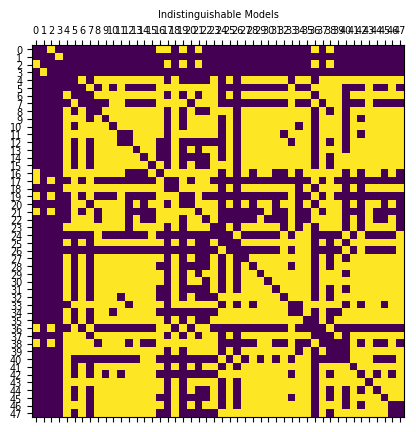

In [222]:
plt.matshow(indistinguishable_matrix)
plt.title('Indistinguishable Models')
plt.xticks(range(num_models))
plt.yticks(range(num_models))
plt.show()

# Critical difference plot

[0, 2, 17, 19, 21, 36, 38]
[1, 3]
[4, 6, 8, 9, 10, 11, 13, 14, 15, 18, 23, 25, 27, 28, 29, 30, 31, 35, 37, 39, 41, 43, 44, 45, 46]
[5, 7, 16, 22, 33]
[12, 32, 34, 42, 47]
[20]
[24, 26, 40]


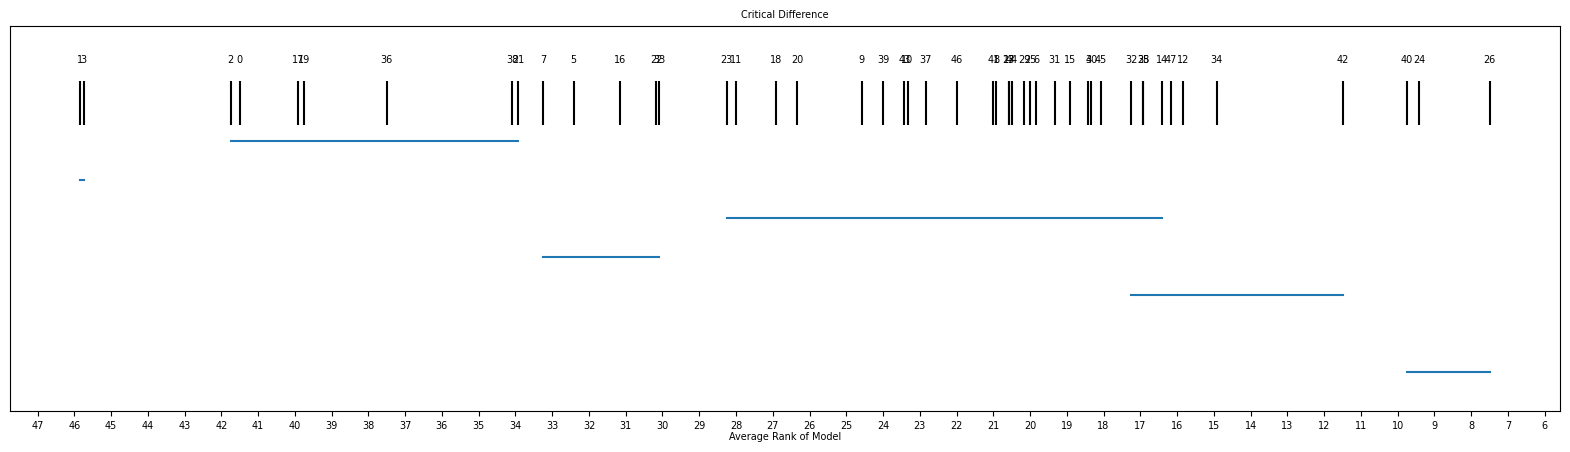

In [223]:

# average rank for model per dataset

average_ranking = ranked.groupby(['min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']).agg({'Rank': 'mean'}).reset_index().sort_values(by='Rank')

plt.figure(figsize=(20, 5))
plt.title("Critical Difference")
plt.scatter(average_ranking['Rank'], np.zeros(num_models), marker='|', c='black', s=1000)
plt.yticks([])
plt.xticks([i for i in range(1, 50)])
plt.gca().invert_xaxis()
# add model id above each point
for i, row in average_ranking.iterrows():
    plt.text(row['Rank'], 1, i, va='bottom', ha='center')

plt.xlabel('Average Rank of Model')

# groups with horizontal connectors
for i, group in enumerate(groups):
    print(group)
    #print(average_ranking.loc[group])
    # get index with minimum rank
    min_rank_idx = average_ranking.loc[group]['Rank'].idxmin()
    max_rank_idx = average_ranking.loc[group]['Rank'].idxmax()
    plt.plot([average_ranking.loc[min_rank_idx]['Rank'], average_ranking.loc[max_rank_idx]['Rank']], [-(i+1), -(i+1)], color='tab:blue')

plt.ylim(-len(groups)-1, 2)
plt.show()

In [224]:
best_models = average_ranking.iloc[0:3]
best_models

,min_epochs,learning_rate,dropout,l2_penalty,init_stride,Rank
26,800,0.00001,0.0,0.001,-1,7.500000
24,800,0.00001,0.0,0.000,-1,9.416667
40,800,0.00100,0.0,0.000,-1,9.750000


In [225]:
results.loc[(results['min_epochs']==800) & (results['learning_rate']==0.001) &\
            (results['dropout']==0) & (results['l2_penalty']==0) & (results['init_stride']==-1)]

,Dataset,min_epochs,learning_rate,dropout,l2_penalty,init_stride,MAPE test
509,DS_-10_80_10,800,0.001,0.0,0.0,-1,0.205921
510,DS_0_80_10,800,0.001,0.0,0.0,-1,0.223900
525,DS_20_80_10,800,0.001,0.0,0.0,-1,0.189706
526,DS_10_80_10,800,0.001,0.0,0.0,-1,0.193481
530,DS_50_80_10,800,0.001,0.0,0.0,-1,0.122839
531,DS_80_80_10,800,0.001,0.0,0.0,-1,0.100783
548,DS_0_10_10,800,0.001,0.0,0.0,-1,0.206149
549,DS_-10_10_10,800,0.001,0.0,0.0,-1,0.202252
554,DS_10_10_10,800,0.001,0.0,0.0,-1,0.189537
555,DS_20_10_10,800,0.001,0.0,0.0,-1,0.198769


In [226]:
results.sort_values(by=rank_by).head(10)

,Dataset,min_epochs,learning_rate,dropout,l2_penalty,init_stride,MAPE test
531,DS_80_80_10,800,0.0010,0.0,0.000,-1,0.100783
516,DS_80_80_10,800,0.0001,0.0,0.001,-1,0.101466
511,DS_80_80_10,800,0.0001,0.0,0.000,-1,0.102047
151,DS_50_80_10,50,0.0010,0.0,0.001,-1,0.117498
523,DS_50_80_10,800,0.0010,0.0,0.000,2,0.117515
143,DS_50_80_10,50,0.0010,0.0,0.000,-1,0.119242
156,DS_50_80_10,50,0.0010,0.3,0.000,2,0.119961
519,DS_50_80_10,800,0.0001,0.0,0.001,-1,0.120082
490,DS_50_80_10,800,0.0001,0.0,0.000,2,0.120575
532,DS_50_80_10,800,0.0010,0.0,0.001,2,0.120619
